(how-to:data:share:archive:profile)=

# How to inspect an archive

```{note}
This tutorial can be downloaded and run as a Jupyter Notebook: {nb-download}`archive_profile.ipynb` {octicon}`download`, together with the archive {download}`process.aiida`.
```

The AiiDA archive is a file format for long term storage of data from a particular profile.
See {ref}`how-to:share:archives` for information on how to create and migrate an archive.

The easiest way to inspect the contents of an archive is to create a profile that "mounts" the archive as its data storage:

In [1]:
!verdi profile setup core.sqlite_zip -n --profile archive --filepath process.aiida

Report: Initialising the storage backend.
Report: Storage initialisation completed.
Success: Created new profile `archive`.
Success: archive set as default profile


Report: Storage initialisation completed.


Success: Created new profile `archive`.
Success: archive set as default profile


You can now inspect the contents of the `process.aiida` archive by using the `archive` profile in the same way you would a standard AiiDA profile.
For example, you can start an interactive shell using `verdi -p archive shell` or if you are already in a notebook simply load the profile:

In [2]:
from aiida import load_profile
load_profile('archive', allow_switch=True)

Profile<uuid='1221db6de9084dca97e9a35487011a0c' name='archive'>

```{warning}
A profile using the `core.sqlite_zip` storage is read-only.
It is therefore possible to query data, but trying to modify existing data or store new data will raise an exception.
```

Just as with a normal profile, we can now use the {py:class}`~aiida.orm.QueryBuilder`, to [find and query for data](how-to:query):

In [3]:
from aiida import orm
process = orm.QueryBuilder().append(orm.ProcessNode).first(flat=True)
print(process)

uuid: cff1e914-5a34-4930-9429-9dcc6d38feb1 (pk: 61)


and also use {py:class}`~aiida.tools.visualization.graph.Graph`, to [visualize data provenance](how-to:data:visualise-provenance):

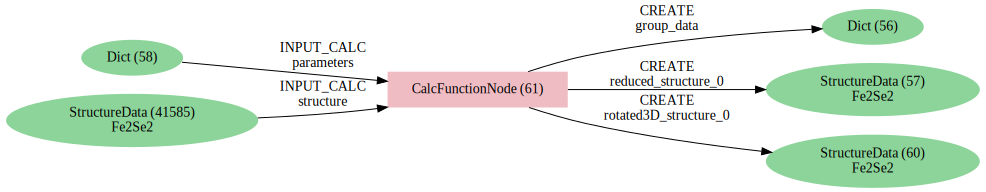

In [4]:
from aiida import orm
from aiida.tools.visualization import Graph
process = orm.QueryBuilder().append(orm.ProcessNode).first(flat=True)
graph = Graph(graph_attr={'rankdir': 'LR'})
graph.add_incoming(process, annotate_links='both')
graph.add_outgoing(process, annotate_links='both')
graph.graphviz

Once you are done inspecting the archive and you no longer want to keep the profile around, you can delete it:
```{code-block} console
verdi profile delete archive
```
You will be prompted whether you also want to keep the data.
If you want to keep the `process.aiida` archive file, select not to delete the data.